In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

Read daily volatility data
https://www.youtube.com/watch?v=xuqgKuyy37E&ab_channel=PythonTutorialsforStockMarket

In [24]:
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [120]:
data = pd.read_csv('daily_rv_hour_data.csv', index_col=0)

In [121]:
data

,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
1/11/2023,0.000130,0.000072,0.000125,0.000110,0.000259,0.000196,0.000155,0.000047,0.000323,0.000123,...,0.000058,0.000287,0.000251,0.000092,0.000042,0.000038,0.000057,0.000039,0.000053,0.000019
1/12/2023,0.000078,0.000201,0.000077,0.000065,0.000077,0.000959,0.000443,0.000018,0.000628,0.000056,...,0.000050,0.000540,0.000144,0.000229,0.000163,0.000083,0.000051,0.000088,0.000041,0.000069
1/13/2023,0.000139,0.000079,0.000071,0.000065,0.000196,0.000579,0.000032,0.000009,0.001005,0.000020,...,0.000072,0.000113,0.000098,0.000039,0.000006,0.000054,0.000012,0.000044,0.000068,0.000038
1/17/2023,0.000024,0.000043,0.000017,0.000020,0.000084,0.000118,0.000088,0.000028,0.000181,0.000054,...,0.000007,0.000153,0.000055,0.000134,0.000067,0.000099,0.000066,0.000019,0.000068,0.000012
1/18/2023,0.000130,0.000188,0.000092,0.000109,0.000180,0.000234,0.000286,0.000099,0.000996,0.000125,...,0.000195,0.000339,0.000051,0.000368,0.000103,0.000069,0.000254,0.000123,0.000105,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/4/2024,0.000038,0.000028,0.000059,0.000049,0.000109,0.000132,0.000052,0.000038,0.000119,0.000345,...,0.000029,0.000140,0.000095,0.000210,0.000174,0.000012,0.000102,0.000010,0.000080,0.000068
1/5/2024,0.000139,0.000075,0.000046,0.000044,0.000086,0.000254,0.000111,0.000018,0.000121,0.000147,...,0.000071,0.000107,0.000088,0.000187,0.000066,0.000017,0.000040,0.000062,0.000069,0.000025
1/8/2024,0.000024,0.000044,0.000035,0.000036,0.000052,0.000183,0.000070,0.000048,0.000155,0.000225,...,0.000025,0.000055,0.000113,0.000071,0.000082,0.000009,0.000074,0.000048,0.000007,0.000042
1/9/2024,0.000061,0.000054,0.000073,0.000064,0.000080,0.000658,0.000055,0.000010,0.000159,0.000067,...,0.000023,0.000064,0.000073,0.000149,0.000046,0.000039,0.000056,0.000018,0.000093,0.000034


In [122]:
train, test = data[:round(len(data)*0.7)], data[round(len(data)*0.7):] 

In [123]:
test

,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
9/25/2023,0.000078,0.000091,0.000065,0.000060,0.000079,0.000184,0.000191,0.000031,0.000350,0.000138,...,0.000064,0.000063,0.000032,0.000139,0.000104,0.000066,0.000078,0.000029,0.000093,0.000041
9/26/2023,0.000027,0.000056,0.000074,0.000075,0.000190,0.000350,0.000118,0.000025,0.000259,0.000020,...,0.000064,0.000082,0.000096,0.000023,0.000073,0.000027,0.000043,0.000058,0.000055,0.000033
9/27/2023,0.000072,0.000115,0.000118,0.000103,0.000304,0.000356,0.000849,0.000043,0.000718,0.000078,...,0.000020,0.000236,0.000112,0.000338,0.000136,0.000077,0.000040,0.000040,0.000112,0.000063
9/28/2023,0.000087,0.000069,0.000152,0.000154,0.000170,0.000206,0.000236,0.000017,0.000649,0.000050,...,0.000013,0.000147,0.000006,0.000148,0.000029,0.000084,0.000035,0.000026,0.000370,0.000018
9/29/2023,0.000072,0.000059,0.000166,0.000156,0.000077,0.000134,0.000361,0.000073,0.000517,0.000147,...,0.000092,0.000098,0.000047,0.000102,0.000035,0.000055,0.000071,0.000071,0.000228,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/4/2024,0.000038,0.000028,0.000059,0.000049,0.000109,0.000132,0.000052,0.000038,0.000119,0.000345,...,0.000029,0.000140,0.000095,0.000210,0.000174,0.000012,0.000102,0.000010,0.000080,0.000068
1/5/2024,0.000139,0.000075,0.000046,0.000044,0.000086,0.000254,0.000111,0.000018,0.000121,0.000147,...,0.000071,0.000107,0.000088,0.000187,0.000066,0.000017,0.000040,0.000062,0.000069,0.000025
1/8/2024,0.000024,0.000044,0.000035,0.000036,0.000052,0.000183,0.000070,0.000048,0.000155,0.000225,...,0.000025,0.000055,0.000113,0.000071,0.000082,0.000009,0.000074,0.000048,0.000007,0.000042
1/9/2024,0.000061,0.000054,0.000073,0.000064,0.000080,0.000658,0.000055,0.000010,0.000159,0.000067,...,0.000023,0.000064,0.000073,0.000149,0.000046,0.000039,0.000056,0.000018,0.000093,0.000034


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
scaler.fit(train)

MinMaxScaler()

In [91]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [92]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [158]:
length=21
batch_size = 1024
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size=batch_size)

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [142]:
scaled_train.shape

(176, 100)

In [160]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [161]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
Total params: 35300 (137.89 KB)
Trainable params: 35300 (137.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=batch_size)

In [163]:
model.fit_generator(generator, epochs=100,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/100


C:\Users\anato\AppData\Local\Temp\ipykernel_19512\2432282585.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=100,


1/1 [==============================] - 4s 4s/step - loss: 0.0430 - val_loss: 0.0315
Epoch 2/100
1/1 [==============================] - 0s 118ms/step - loss: 0.0382 - val_loss: 0.0291
Epoch 3/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0349 - val_loss: 0.0273
Epoch 4/100
1/1 [==============================] - 0s 118ms/step - loss: 0.0324 - val_loss: 0.0259
Epoch 5/100
1/1 [==============================] - 0s 117ms/step - loss: 0.0305 - val_loss: 0.0248
Epoch 6/100
1/1 [==============================] - 0s 112ms/step - loss: 0.0289 - val_loss: 0.0238
Epoch 7/100
1/1 [==============================] - 0s 111ms/step - loss: 0.0274 - val_loss: 0.0229
Epoch 8/100
1/1 [==============================] - 0s 112ms/step - loss: 0.0262 - val_loss: 0.0221
Epoch 9/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0250 - val_loss: 0.0215
Epoch 10/100
1/1 [==============================] - 0s 172ms/step - loss: 0.0240 - val_loss: 0.0209
Epoch 11/100
1/1 [======

<Axes: >

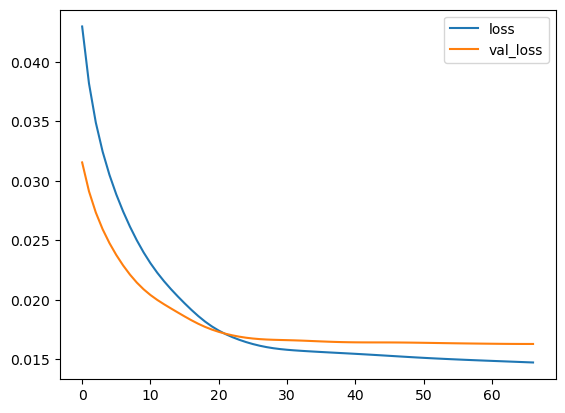

In [164]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [165]:
first_eval_batch = scaled_train[-length:]

In [166]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [167]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 743ms/step


array([[0.09094199, 0.0610584 , 0.09506779, 0.11068606, 0.10606337,
        0.11427908, 0.06290901, 0.08154596, 0.08250639, 0.06908959,
        0.15426843, 0.05022176, 0.11559935, 0.10148357, 0.11963455,
        0.15780982, 0.09617715, 0.07057939, 0.11738372, 0.19205928,
        0.09352261, 0.09586065, 0.07974289, 0.14266619, 0.08994763,
        0.1337928 , 0.12061851, 0.10558499, 0.09184959, 0.04026075,
        0.14333718, 0.17179297, 0.08898544, 0.03689694, 0.1396727 ,
        0.06304876, 0.06749876, 0.14239043, 0.01082356, 0.0766926 ,
        0.07276849, 0.14775465, 0.10541586, 0.05736472, 0.03725357,
        0.06959367, 0.1371453 , 0.14184152, 0.14837433, 0.06618673,
        0.05881351, 0.13370757, 0.15451139, 0.0962882 , 0.1295425 ,
        0.13071957, 0.07116216, 0.08619072, 0.12397604, 0.10430689,
        0.0325846 , 0.11137006, 0.09513959, 0.11249222, 0.14805701,
        0.14895947, 0.17291087, 0.06206245, 0.0929709 , 0.08325724,
        0.09561744, 0.10674401, 0.17005654, 0.13

In [168]:
scaled_test[0]

array([0.11535345, 0.04916995, 0.05134964, 0.04889479, 0.0406186 ,
       0.07583129, 0.05960057, 0.05969692, 0.07896828, 0.06689272,
       0.27359684, 0.08845979, 0.04669807, 0.25365112, 0.05613818,
       0.16674748, 0.03813336, 0.01601525, 0.03634797, 0.08461624,
       0.05147839, 0.0784534 , 0.06515969, 0.05632102, 0.06494367,
       0.11128655, 0.07360166, 0.13639937, 0.1051121 , 0.0243782 ,
       0.1933017 , 0.16144953, 0.07334993, 0.01751591, 0.01450428,
       0.13591456, 0.10386763, 0.03843828, 0.03256377, 0.0424576 ,
       0.07735167, 0.0512937 , 0.10398588, 0.08154132, 0.0040708 ,
       0.03575499, 0.22734406, 0.02513647, 0.05734936, 0.09785972,
       0.05811973, 0.16064857, 0.21725457, 0.08771468, 0.12186988,
       0.03173942, 0.0575861 , 0.04050265, 0.04486102, 0.11749522,
       0.01325386, 0.14550825, 0.16020918, 0.12856432, 0.04395434,
       0.05758415, 0.22280769, 0.02611579, 0.03059899, 0.06666401,
       0.04223733, 0.09171143, 0.15123057, 0.03389748, 0.03007

In [169]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    

1/1 [==============================] - 0s 40ms/step


In [170]:
test_predictions

[array([0.09094199, 0.0610584 , 0.09506779, 0.11068606, 0.10606337,
        0.11427908, 0.06290901, 0.08154596, 0.08250639, 0.06908959,
        0.15426843, 0.05022176, 0.11559935, 0.10148357, 0.11963455,
        0.15780982, 0.09617715, 0.07057939, 0.11738372, 0.19205928,
        0.09352261, 0.09586065, 0.07974289, 0.14266619, 0.08994763,
        0.1337928 , 0.12061851, 0.10558499, 0.09184959, 0.04026075,
        0.14333718, 0.17179297, 0.08898544, 0.03689694, 0.1396727 ,
        0.06304876, 0.06749876, 0.14239043, 0.01082356, 0.0766926 ,
        0.07276849, 0.14775465, 0.10541586, 0.05736472, 0.03725357,
        0.06959367, 0.1371453 , 0.14184152, 0.14837433, 0.06618673,
        0.05881351, 0.13370757, 0.15451139, 0.0962882 , 0.1295425 ,
        0.13071957, 0.07116216, 0.08619072, 0.12397604, 0.10430689,
        0.0325846 , 0.11137006, 0.09513959, 0.11249222, 0.14805701,
        0.14895947, 0.17291087, 0.06206245, 0.0929709 , 0.08325724,
        0.09561744, 0.10674401, 0.17005654, 0.13

In [171]:
true_predictions = scaler.inverse_transform(test_predictions)

In [172]:
true_predictions

array([[6.21243844e-05, 1.11426992e-04, 1.10232042e-04, ...,
        4.66693741e-05, 7.29128417e-05, 5.78781964e-05],
       [6.53798753e-05, 1.17856102e-04, 1.23325044e-04, ...,
        4.79756492e-05, 9.13902963e-05, 6.44548878e-05],
       [6.78158278e-05, 1.23907153e-04, 1.28974384e-04, ...,
        4.95491815e-05, 1.00668476e-04, 6.84246703e-05],
       ...,
       [8.09419518e-05, 1.40040309e-04, 1.44447983e-04, ...,
        5.81519542e-05, 1.47716569e-04, 7.79340562e-05],
       [8.09442663e-05, 1.40042299e-04, 1.44451801e-04, ...,
        5.81537086e-05, 1.47722981e-04, 7.79362523e-05],
       [8.09464183e-05, 1.40044133e-04, 1.44455183e-04, ...,
        5.81553258e-05, 1.47728729e-04, 7.79382619e-05]])

In [173]:
test

,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
9/25/2023,0.000078,0.000091,0.000065,0.000060,0.000079,0.000184,0.000191,0.000031,0.000350,0.000138,...,0.000064,0.000063,0.000032,0.000139,0.000104,0.000066,0.000078,0.000029,0.000093,0.000041
9/26/2023,0.000027,0.000056,0.000074,0.000075,0.000190,0.000350,0.000118,0.000025,0.000259,0.000020,...,0.000064,0.000082,0.000096,0.000023,0.000073,0.000027,0.000043,0.000058,0.000055,0.000033
9/27/2023,0.000072,0.000115,0.000118,0.000103,0.000304,0.000356,0.000849,0.000043,0.000718,0.000078,...,0.000020,0.000236,0.000112,0.000338,0.000136,0.000077,0.000040,0.000040,0.000112,0.000063
9/28/2023,0.000087,0.000069,0.000152,0.000154,0.000170,0.000206,0.000236,0.000017,0.000649,0.000050,...,0.000013,0.000147,0.000006,0.000148,0.000029,0.000084,0.000035,0.000026,0.000370,0.000018
9/29/2023,0.000072,0.000059,0.000166,0.000156,0.000077,0.000134,0.000361,0.000073,0.000517,0.000147,...,0.000092,0.000098,0.000047,0.000102,0.000035,0.000055,0.000071,0.000071,0.000228,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/4/2024,0.000038,0.000028,0.000059,0.000049,0.000109,0.000132,0.000052,0.000038,0.000119,0.000345,...,0.000029,0.000140,0.000095,0.000210,0.000174,0.000012,0.000102,0.000010,0.000080,0.000068
1/5/2024,0.000139,0.000075,0.000046,0.000044,0.000086,0.000254,0.000111,0.000018,0.000121,0.000147,...,0.000071,0.000107,0.000088,0.000187,0.000066,0.000017,0.000040,0.000062,0.000069,0.000025
1/8/2024,0.000024,0.000044,0.000035,0.000036,0.000052,0.000183,0.000070,0.000048,0.000155,0.000225,...,0.000025,0.000055,0.000113,0.000071,0.000082,0.000009,0.000074,0.000048,0.000007,0.000042
1/9/2024,0.000061,0.000054,0.000073,0.000064,0.000080,0.000658,0.000055,0.000010,0.000159,0.000067,...,0.000023,0.000064,0.000073,0.000149,0.000046,0.000039,0.000056,0.000018,0.000093,0.000034


In [174]:
true_precitions = pd.DataFrame(data=true_predictions, columns=test.columns)

In [175]:
true_precitions

,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,LLY,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
0,0.000062,0.000111,0.000110,0.000128,0.000193,0.000259,0.000201,0.000041,0.000365,0.000142,...,0.000037,0.000208,0.000109,0.000128,0.000187,0.000072,0.000148,0.000047,0.000073,0.000058
1,0.000065,0.000118,0.000123,0.000129,0.000180,0.000259,0.000196,0.000042,0.000369,0.000122,...,0.000041,0.000210,0.000108,0.000134,0.000168,0.000071,0.000142,0.000048,0.000091,0.000064
2,0.000068,0.000124,0.000129,0.000132,0.000164,0.000263,0.000196,0.000042,0.000367,0.000109,...,0.000043,0.000211,0.000105,0.000137,0.000153,0.000070,0.000136,0.000050,0.000101,0.000068
3,0.000070,0.000128,0.000132,0.000135,0.000153,0.000268,0.000197,0.000043,0.000368,0.000102,...,0.000045,0.000212,0.000103,0.000140,0.000142,0.000070,0.000131,0.000051,0.000107,0.000071
4,0.000072,0.000130,0.000135,0.000137,0.000146,0.000271,0.000199,0.000043,0.000373,0.000098,...,0.000047,0.000212,0.000101,0.000142,0.000135,0.000070,0.000128,0.000052,0.000112,0.000072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000081,0.000140,0.000144,0.000145,0.000155,0.000305,0.000220,0.000052,0.000435,0.000103,...,0.000054,0.000231,0.000108,0.000159,0.000124,0.000075,0.000131,0.000058,0.000148,0.000078
71,0.000081,0.000140,0.000144,0.000145,0.000155,0.000305,0.000220,0.000052,0.000435,0.000103,...,0.000054,0.000231,0.000108,0.000159,0.000124,0.000075,0.000131,0.000058,0.000148,0.000078
72,0.000081,0.000140,0.000144,0.000145,0.000155,0.000305,0.000220,0.000052,0.000435,0.000103,...,0.000054,0.000231,0.000108,0.000159,0.000124,0.000075,0.000131,0.000058,0.000148,0.000078
73,0.000081,0.000140,0.000144,0.000145,0.000155,0.000305,0.000220,0.000052,0.000436,0.000103,...,0.000054,0.000231,0.000108,0.000159,0.000124,0.000075,0.000131,0.000058,0.000148,0.000078
